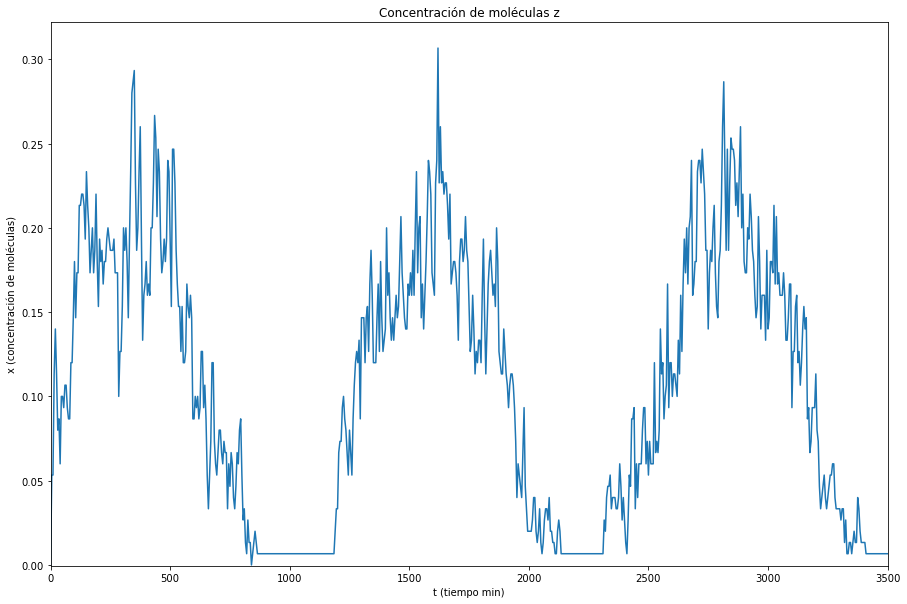

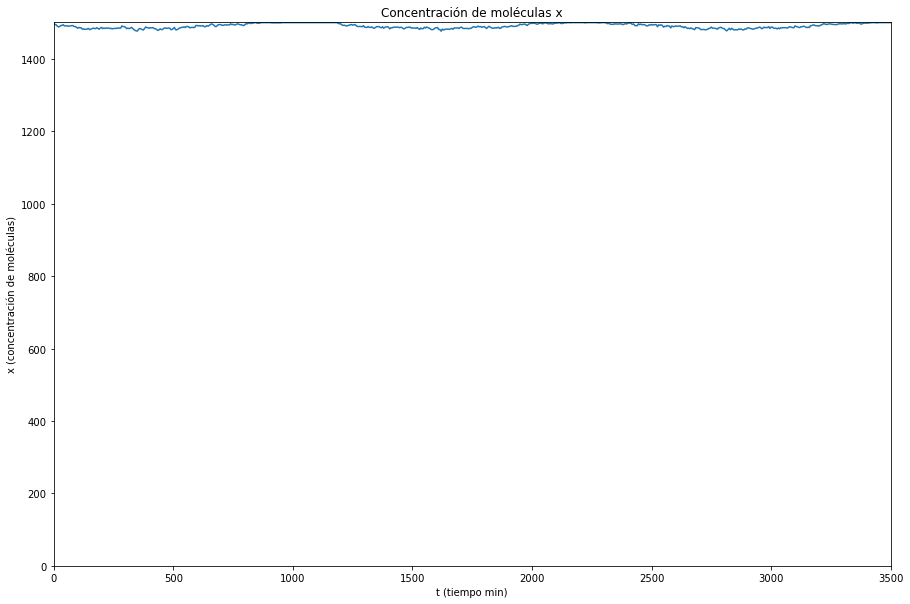

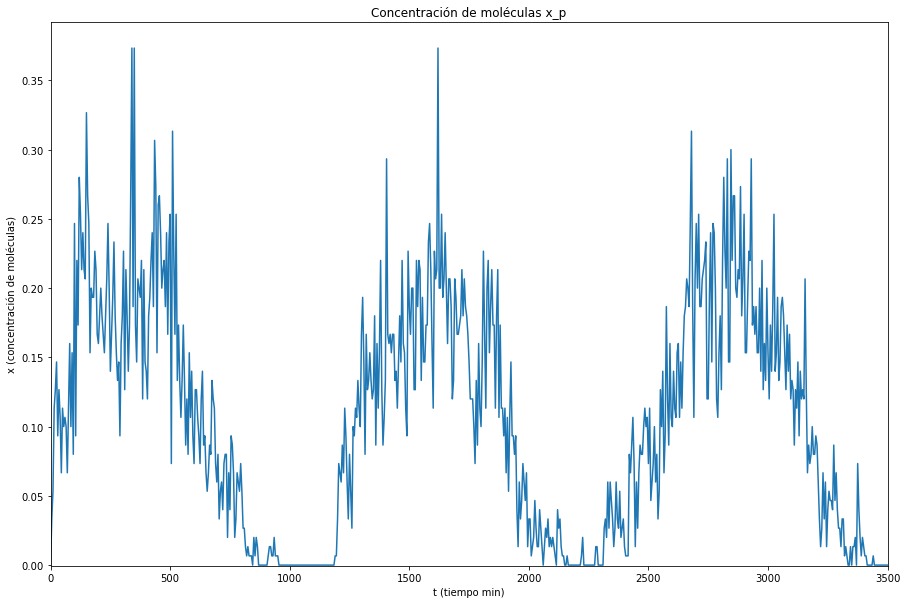

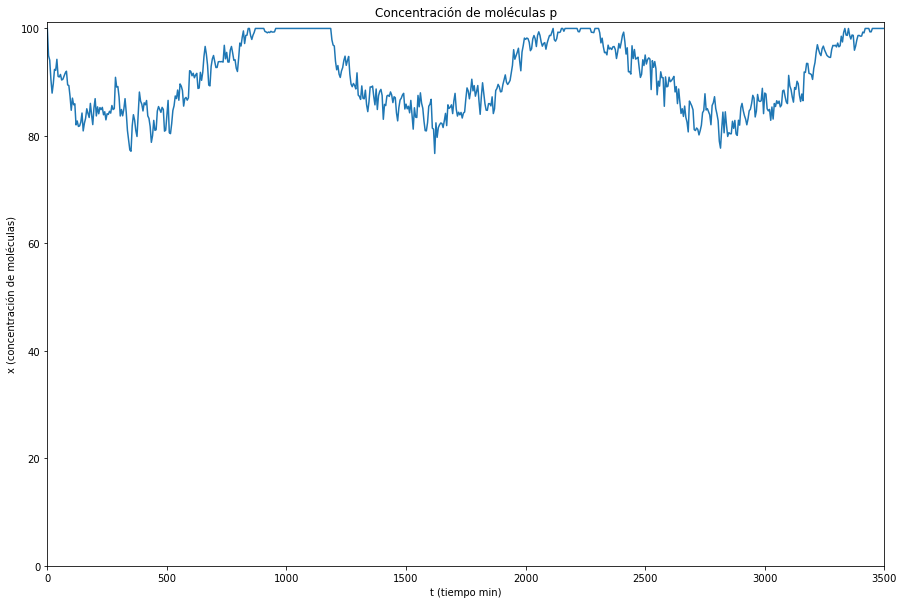

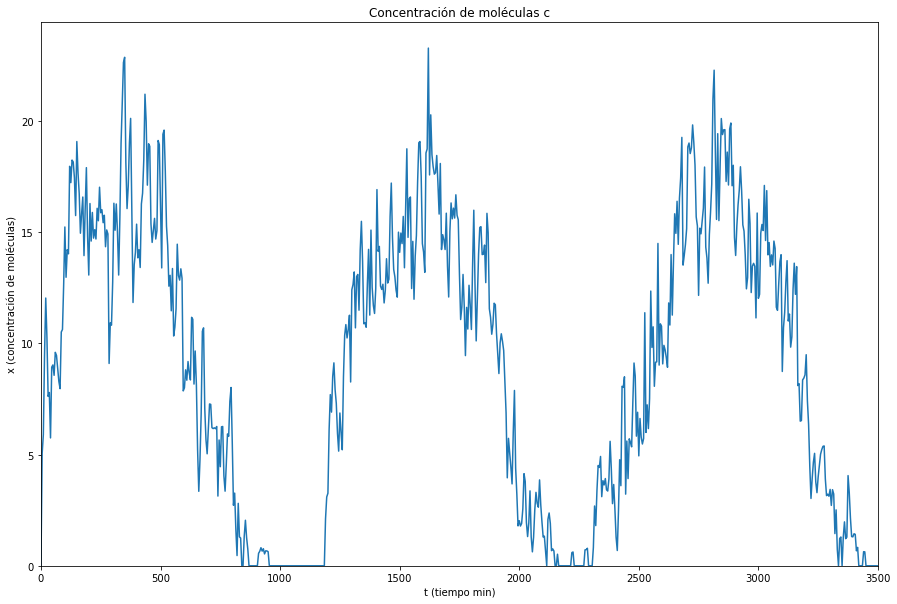

In [3]:
'Algoritmo de Guillespie' 'fosfoliracion caso 1'

#En este programa se implementa el agoritmo de Gillespie para reacciones quimicas
#comunes y convencionales.

# se importan las librerias que seran usadas
import numpy as np
import math 
import random as rnd
import matplotlib.pyplot as plt

#para implementar el algoritmo son necesarias algunas cantidades y definir algunos parametros
#condiciones iniciales de las variables involucradas y el tiempo

def z(t):
    return 0.01*(1+ math.sin(0.005*t))

t0=0 #tiempo inicial
tf= 3500 # tiempo final
t1=5
Omega=150 #tamano del sistema
x=[0, 1500*Omega, 0, 1500*Omega, 100*Omega, 0] #vector de condiciones iniciales [X0,Y0,Z0]
h= 1 #numero de veces para realizar la misma simulacion
n= len(x) #numero de especies quimicas involucradas

#parametros
k1=[50,50,10]  #vector de k+
k2=[0, 0, 10]  #vector de k-

#matrices de coeficientes estequiometricos
alpha= [[1,1,0,0,0,0],
        [0,0,1,1,0,0],
        [0,0,1,0,1,0],
        [0,0,0,0,0,0]]

beta= [[1,0,1,0,0,0],
       [0,1,0,1,0,0],
       [0,0,0,0,0,1],
       [1,0,0,0,0,0]]

#contruimos la matriz estequiometrica 'evitar editar a partir de esta linea'
S= np.subtract( beta,alpha)
S=S.T
S= np.append(S, -S, axis = 1)

# miscelanea de funciones usadas
def dist_exp(a):# funcion para calcular tau 
    r = rnd.random()
    return -(1./(a))*math.log(r)
    
def numero(S1,a): # funcion que devuelve mu
    l1=0
    l2= S1[0]/a
    l3=0
    r=np.random.rand()
    while l3<1:
        if r<=l2:
            l3=l3+1
            return l1
        else:
            l1=l1+1
            l2= l2 + S1[l1]/a
 
# la funcion que esta a continuacion nos permite realizar  el proceso estocastico hasta que haya 
#pasado T tiempo para un determinado tamano del sistema.

def ev(x,j): #x=condicion inicial, p= numero de pasos, j=tamano del sistema
    t = np.arange(0,tf+t1,t1)
    l3=0
    Z=np.zeros([n,len(t)])
    Y = x
    Z[:,0] = x[:]
    l6=1
    while l6<len(t) or l3<tf:
        if l3<(l6)*t1:
            ni1 = [k1[0]*Y[0]*Y[1]/j, k1[1]*Y[2]*Y[3]/j, k1[2]*Y[2]*Y[4]/j, j*z(l3),0 , 0, k2[2]*Y[5],0.1*Y[0]] #vector de propension
            a=sum(ni1)
            tau = dist_exp(a)
            mu = numero(ni1,a)
            Y[:] +=  S[:,mu]
            l3=l3+tau
        else:
            Z[:,l6]=Y[:]
            l6=l6+1
    return t ,  Z

#con la funcion que ya hemos programado, podemos repetirla algun numero determinado de veces,
# para ello claculamos la funcion anterior algun numero de veces y la graficamos 

nom=['Concentración de moléculas z', 'Concentración de moléculas x', 'Concentración de moléculas x_p', 
    'Concentración de moléculas y', 'Concentración de moléculas p', 'Concentración de moléculas c' ]

def varios1(x,j,q): #p= pasos  j= tamano del sistema, 
   # q= numero de veces que se realiza la misma simulacion 
    l1=0
    l2=len(x)
    while l1<q:
        T0, l3 =ev(x,j)
        for i in range(l2):
          if i!=3: 
            plt.figure(i,figsize=(15,10))
            plt.plot(T0,l3[i]/j)
            plt.xlabel("t (tiempo min)")
            plt.ylabel("x (concentración de moléculas)")
            plt.title(nom[i])
            plt.xlim(0, tf)
            plt.ylim(-0.0005)
        l1=l1+1
    #plt.legend()
    plt.show()

   
#realizar las graficas de las variables
varios1(x,Omega,h)

In [5]:
import statistics as st

#funciones para poder graficar
def heav(vec): #funcion que devuelve solo valores mayores que cero
    if vec>=0:
        vec=vec                 
    else:
        vec=0  
    return vec

def varios(x,j,q): #p= pasos  j= tamano del sistema, 
   # q= numero de veces que se realiza la misma simulacion 
    l1=0
    while l1<q:
        if l1==0:
            x=[0, Omega, 0, Omega, 100, 0]
            T0, l2 =ev(x,j)
            ky=len(T0)
            l4= np.zeros([n,ky,q])
            l3=np.zeros([n,ky])
            l5=np.zeros([n,ky])
            l6=np.zeros([n,ky])
            l4[:,:,l1]=l2
            l1=l1+1
        else:
            x=[0, Omega, 0, Omega, 100, 0]
            T0, l2 =ev(x,j)
            l4[:,:,l1]=l2
            l1=l1+1
    for i in range(n):
        for j2 in range(ky):
            l3[i][j2]=st.mean(l4[i,j2,:])
            l5[i][j2]=math.sqrt(st.pvariance(l4[i,j2,:],l3[i][j2]))
            l6[i,j2]= heav(l3[i,j2]- 2*l5[i,j2] )
    for i in range(n):
        plt.figure(i, figsize=(15,10))
        plt.plot(T0,l3[i],color="green", label=nom2[i])
        plt.plot(T0,l3[i] + 2*l5[i],'--', color="red", label=nom3[i])
        plt.plot(T0,l6[i],':', color="red", label=nom4[i])
        plt.xlabel("t (tiempo)")
        plt.ylabel("x (número de moléculas)")
        plt.title( nom1[i] )
        plt.xlim(0, tf)
        plt.ylim(0)
        plt.legend()
    plt.show()

h=1000
nom1=['Promedio del número de moléculas z', 'Promedio del número de moléculas x', 'Promedio del número de moléculas x_p', 
    'Promedio del número de moléculas y', 'Promedio del número de moléculas p', 'Promedio del número de moléculas c']

nom2=['z', 'x', 'x_p', ' y', 'p', 'c', 'c_1', 'c_2' ]

nom3=['z + 2*sigma', 'x+ 2*sigma', 'x_p+ 2*sigma', ' y+ 2*sigma', 'p+ 2*sigma', 'c+ 2*sigma' ]

nom4=['z - 2*sigma', 'x- 2*sigma', 'x_p- 2*sigma', ' y- 2*sigma', 'p- 2*sigma', 'c- 2*sigma' ]
#realizar las graficas de las variables
varios(x,Omega,h)

KeyboardInterrupt: 

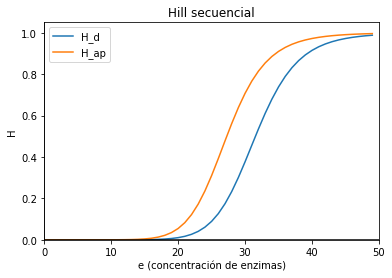

In [ ]:
'funciones de Hill'

#programa para graficar las difernetes funciones de Hill

# se importan las librerias
import numpy as np
import math 
import random as rnd
from matplotlib import pyplot

def fac(n): #x!
    if n<0:
        return 0
    else:
        l1=0
        l2=1
        while l1 < n:
          l1=l1+1
          l2=l1*l2
        return l2

def prod(x, n): # x!/(x-n)!
    l2=x-n
    if n==0:
        return 1
    if l2==0 or l2==1:
        return fac(x)
    else:
        xprod= l2+1
        if n!=0 and l2>0:
            for i in range(1,n):
                xprod= xprod * (l2+1+i)
            return xprod
        elif l2<0:
             return 0
        else:
            return 1

def exponencial(y,n):
    if n==0:
        return 1
    else:
        return y**n

def series(x,K,n):
    l1=0
    l2=0
    while l1<n+1:
       l3= exponencial(K,n-l1)* exponencial(x,l1)
       l2=l2+l3
       l1=l1+1
    return l2

def seriei(x,K,n):
    l1=0
    l2=0
    while l1<n+1:
       l3= exponencial(K,n-l1)* exponencial(x,l1) * prod(n,l1)/fac(l1)
       l2=l2+l3
       l1=l1+1
    return l2

def H_d(x,n,K,j): #funcion de hill determinista
    return (x/j)**n/(K + (x/j)**n)

def H_sd(x,n,K,j):# funcion de Hill semideterminista
    if x<n:
        return 0
    if x>=n and x<j/2:
        return prod(x,n)/(K*(j**n) + prod(x,n))
    if x>=n and x>=25:
        return prod(x+n,n)/(K*(j**n) + prod(x+n,n))

def H_ss(x,n,K,j):# funcion de Hill semiestocastica
    if x<n:
        return 0
    if x>=n and x<j/2:
        return prod(x,n)/(K*(j**n)*np.exp((n-1)/j) + prod(x,n))
    if x>=n and x>=j/2:
        return prod(x+n,n)/(K*(j**n)*np.exp((n-1)/j) + prod(x+n,n))

def H_ap(x,n,K,j): # funcion de hill con aproximaciones
    return ((x/j)**n + (n/(j))*(n-1)*(x/j)**(n-1) )/(K + (x/j)**n + (n/(j))*(n-1)*(x/j)**(n-1))

def H_ds(x,n,K,j): #funcion de hill determinista secuencial
    return (x/j)**n/(series((x/j),K,n))

def H_ds1(x,n,K,j): #funcion de hill determinista secuencial exacto
    return (x/j-K)*(x/j)**n/((x/j)**(n+1)-(K)**(n+1))

def H_di(x,n,K,j): #funcion de hill determinista independiente
    return (x/j)**n/(K+x/j)**n

def H_di1(x,n,K1,K2,K3,j): #funcion de hill determinista independiente
    return (x/j)**n/(1 + K1*x + K1*K2*x**2 + K1*K2*K3*x**3 + x**n )

# Valores del eje X que toma el gráfico.
#x = np.arange(0.0000001, 200, 0.0001)
x=range(0,50)

#Xy= [math.log(i) for i in x ]
# Graficar ambas funciones.
#pyplot.plot(x, [H_di(i,1,1,1) for i in x], label='n=1')
pyplot.plot(x, [H_d(i,10,.01,50) for i in x], label='H_d')
pyplot.plot(x, [H_ap(i,10,.01,50) for i in x], label='H_ap')
#pyplot.plot(x, [H_ap(i,3,.01,50) for i in x], label='n=1.7')

# Establecer el color de los ejes.
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")

# Limitar los valores de los ejes.
pyplot.xlim(0, 50)
pyplot.ylim(0, 1.05)
pyplot.title("Hill secuencial")
pyplot.xlabel("e (concentración de enzimas)")
pyplot.ylabel("H")
pyplot.legend()

# Guardar gráfico como imágen PNG.
pyplot.savefig("han10.png")

# Mostrarlo.
pyplot.show()